In [136]:
import pandas as pd
from keras.src.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.callbacks import EarlyStopping

In [137]:
df = pd.read_csv('./zadanie1_dataset.csv')

In [138]:
# Remove unnecessary columns
df = df.drop(columns=['url', 'name', 'genres', 'filtered_genres', 'top_genre'])

In [139]:
# Deal with outliers - Remove outliers
df = df[(df['danceability'] >= 0) & (df['danceability'] <= 1)]
df = df[(df['loudness'] >= -60) & (df['loudness'] <= 0)]
# df = df[(df['duration_ms'] > 0) & (df['duration_ms'] < 1000000)]
df = df.dropna(subset=['popularity'])
df = df.dropna(subset=['number_of_artists'])

In [140]:
# Encode
df['explicit'] = df['explicit'].astype(int)

In [141]:
# Split the data into input and output
X = df.drop(columns=['emotion'])
y = df['emotion']

In [142]:
y = pd.get_dummies(df['emotion'])

# Rename the columns to match your desired output
y.columns = ['calm', 'energetic', 'happy', 'sad']

In [144]:
# Split dataset into train, valid and test
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, shuffle=True, test_size=0.5, random_state=42)

In [145]:
# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [146]:
# Convert numpy arrays to pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_valid = pd.DataFrame(X_valid, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [147]:
# Train MLP overtrained_model in Keras
# model = Sequential()
# model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(4, activation='softmax'))

# model = Sequential()
# model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(4, activation='softmax'))

# model = Sequential()
# model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(4, activation='softmax'))

# model = Sequential()
# model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(4, activation='softmax'))

model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [148]:
# model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00002), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [149]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [150]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=1000, batch_size=32, callbacks=[early_stopping])

Epoch 1/1000


293/293 [==============================] - 1s 3ms/step - loss: 0.5694 - accuracy: 0.7999 - val_loss: 0.3960 - val_accuracy: 0.8521
Epoch 2/1000
293/293 [==============================] - 1s 3ms/step - loss: 0.3795 - accuracy: 0.8459 - val_loss: 0.3744 - val_accuracy: 0.8530
Epoch 3/1000
293/293 [==============================] - 1s 3ms/step - loss: 0.3608 - accuracy: 0.8524 - val_loss: 0.3463 - val_accuracy: 0.8684
Epoch 4/1000
293/293 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8577 - val_loss: 0.3509 - val_accuracy: 0.8650
Epoch 5/1000
293/293 [==============================] - 1s 3ms/step - loss: 0.3418 - accuracy: 0.8618 - val_loss: 0.3634 - val_accuracy: 0.8573
Epoch 6/1000
293/293 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8617 - val_loss: 0.3302 - val_accuracy: 0.8718
Epoch 7/1000
293/293 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8696 - val_loss: 0.3484 - val_accuracy: 0.8701
Epoch

In [151]:
# evaluate the overtrained_model on the training set
train_scores = model.evaluate(X_train, y_train, verbose=0)

In [152]:
print("*"*100, "Test accuracy", "*"*100)
print(f"Train accuracy: {train_scores[1]:.4f}")

**************************************************************************************************** Test accuracy ****************************************************************************************************
Train accuracy: 0.9088


In [153]:
# Evaluate the overtrained_model
test_scores = model.evaluate(X_test, y_test, verbose=0)

In [154]:
print("*"*100, "Test accuracy", "*"*100)
print(f"Test accuracy: {test_scores[1]:.4f}")

**************************************************************************************************** Test accuracy ****************************************************************************************************
Test accuracy: 0.8796


In [155]:
# Plot confusion matrix
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.25)

37/37 [==============================] - 0s 978us/step


In [156]:
y_test_int = np.argmax(y_test.values, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

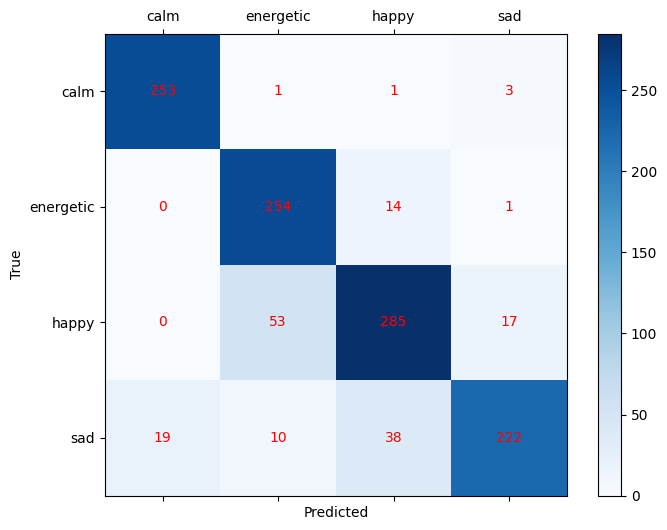

In [157]:
# Assuming true_labels and predicted_labels are already defined
cm = confusion_matrix(y_test_int, y_pred_int)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_xticklabels(['calm', 'energetic', 'happy', 'sad'])
ax.set_yticklabels(['calm', 'energetic', 'happy', 'sad'])

plt.xlabel('Predicted')
plt.ylabel('True')

# Loop over data dimensions and create text annotations.
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")

plt.show()

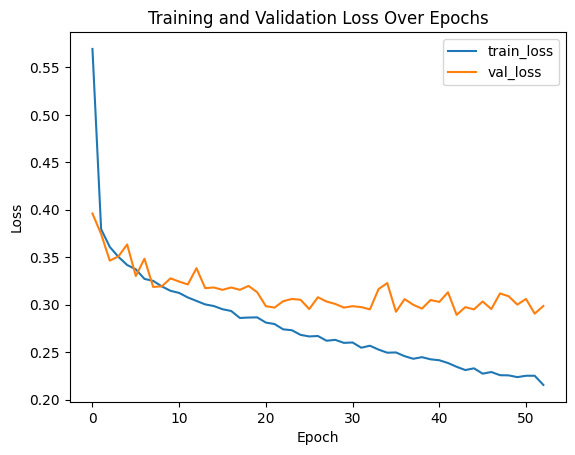

In [158]:
# Plot loss and accuracy
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


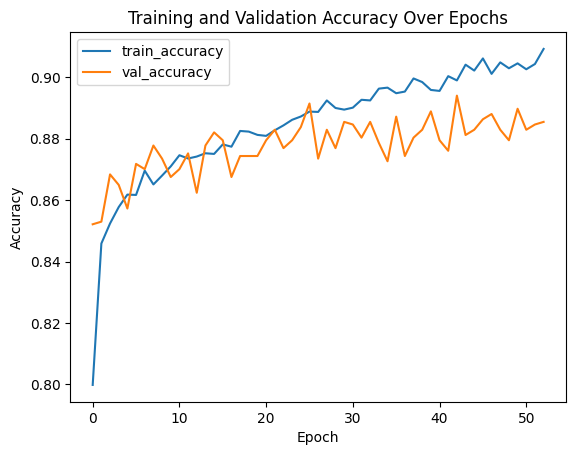

In [159]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()